# Time Series Forecasting on Bitcoin Dataset

# Statistical Models
1. AR
2. MA
3. ARMA
4. AIRMA
5. SARIMA
6. Naive Forecast
7. AutoARIMA
8. ExponentialSmoothing (Requires Smoothening)

# Machine Learning Methods
9. Random Forest (TF-DF)
10. Gradient Boosted Trees (TF-DF)
11. Prophet (Facebook Kats) (Requires Smoothening)
12. Silverkite (LinkedIn Greykite) (Requires Smoothening)
13. Dense Model
14. Same as 1
15. Same as 1
16. Conv1D
17. LSTM
18. Same as 1 but multivariate
19. N-BEATs Algorithm
20. Ensemble
21. Future Prediction model
22. Same as 1 but with turkey data introduced

# How to handle Time Series Data
Features a series should have to do time series forecasting
1. Stationarity : Statistical properties more or less, same over time

  a. Constant Mean

  b. Constant Variance

  c. No Seasonality

  Seasonality : Repeating trends or patterns over time

## How to check if a series is stationary
1. Visual Inspection
2. Global Vs Local check : Finding global mean and variance and comparing it with local mean and variance (There should not be much difference)
3. ADG (Augmented Dickey-Fuller) Test
4. KPPS Test

If our series is not stationary then we have to convert it into stationary methods are below
1. Differencing

    a. First Order Differencing Y(t) - Y(t-1)

    b. Second Order Differencing

    c. Log Operation to smooth exponential curves (Log(exp(x)=x)

    d. Seasonal Differencing Y(t) - Y(t - N)

    Use first order or second order differencing what ever make the series stationary

# Auto Regressive Models (Use PACF for getting the model)
Regression : Used to predict continuous value of an item based on certain parameters

Auto : Uses it's own past values to predict future values

AR(1) = First order auto regression = (Y(t) = C1 * Y(t-1) + C2)

We need to find how the current value is dependent on past values for that we use
1. ACF -> Auto Correlation Function
2. PACF -> Parital Auto Correlation Function

Correlation -> An indicator of relationship between two variables

Auto-Correlation -> Relationship of a variable with it's previous time period values (Lags)

Pearson's Correlation Coefficient: [-1,1] (1 -> Strong correlation)

ACF -> Measure the correlation between current time period and previous time lags . Direct and indirect effect of values in previous time lags

PACF -> Only direct effect of values in previous time lags


# Moving Average Models (Use ACF of getting the model)
In Auto Regression we were using past values to predict the future values in Moving Average we are using the error we made in previous prediction to do future prediction

Auto Regression : (Y(t) = C1 * Y(t-1) + C2 + E(t)) ----> AR(1)

Moving Average : (Y(t) = n + C1 * E(t-1) + E(t)) ----> MA(1)

If in ACF or PACF there are `X` no of bars above the threshold then that many order of model will be used means `MA model of order X` or `AR model of order X`


# ARMA (Auto Regressive and Moving Average) Models
A simple combination of AR and MA model
1. Auto Regression : Uses past values to make prediction : (Y(t) = C1 * Y(t-1) + C2 + E(t))
2. Moving Average : Uses past errors to make prediction : (Y(t) = n + C1 * E(t-1) + E(t))

3. ARMA Model : (Y(t) = n + C1 * E(t-1) + C2 * Y(t-1) + E(t)) ----> ARMA(1, 1)

## How to find the order of ARMA(p, q)
- ACF and PACF plots
- ACF will give value of q
- PACF will give value of p


# ARIMA (Auto Regressive Integrated Moving Average) models
- ARIMA is just ARMA, just does one simple operation on converting Non stationary series to stationary series before
- AR -> Auto Regressive
- I -> Differencing operation to convert non stationary series to stationary
- MA -> Moving Average
## ARIMA(p, d, q)
- p -> order of AR
- d -> order of differencing to get stationary series
- q -> order of MA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Importing and Preprocessing


In [3]:
df = pd.read_csv("/content/bitcoin_2010-07-17_2024-09-09.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,2024-09-09,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,2024-09-08,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,2024-09-07,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,2024-09-06,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,2024-09-05,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [4]:
df.rename(columns={'Start':'Date'}, inplace = True)
df.drop(columns='End', inplace = True, axis=1)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
1,2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2,2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
3,2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
4,2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5168 non-null   object 
 1   Open        5168 non-null   float64
 2   High        5168 non-null   float64
 3   Low         5168 non-null   float64
 4   Close       5168 non-null   float64
 5   Volume      5168 non-null   float64
 6   Market Cap  5168 non-null   float64
dtypes: float64(6), object(1)
memory usage: 282.8+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5168 non-null   datetime64[ns]
 1   Open        5168 non-null   float64       
 2   High        5168 non-null   float64       
 3   Low         5168 non-null   float64       
 4   Close       5168 non-null   float64       
 5   Volume      5168 non-null   float64       
 6   Market Cap  5168 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 282.8 KB


In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2024-09-08,54116.16,55228.47,53694.23,54823.96,7.797330e+10,1.073878e+12
2024-09-07,53976.04,54810.03,53767.28,54188.32,1.214459e+11,1.071141e+12
2024-09-06,56209.17,56896.30,52738.00,53922.68,1.207873e+11,1.091997e+12
2024-09-05,58006.56,58284.98,55835.00,56170.04,1.158143e+11,1.121929e+12
2024-09-04,57644.03,58489.96,55737.91,57984.05,1.192145e+11,1.129078e+12


In [10]:
df.sort_index(ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.152488
2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.595000
2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.220000
2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.178548
2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.375000


In [11]:
len(df)

5168

In [12]:
bitcoin_prices = pd.DataFrame(df['Close']).rename(columns={'Close':'Price'})
bitcoin_prices.head()

,Price
Date,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792


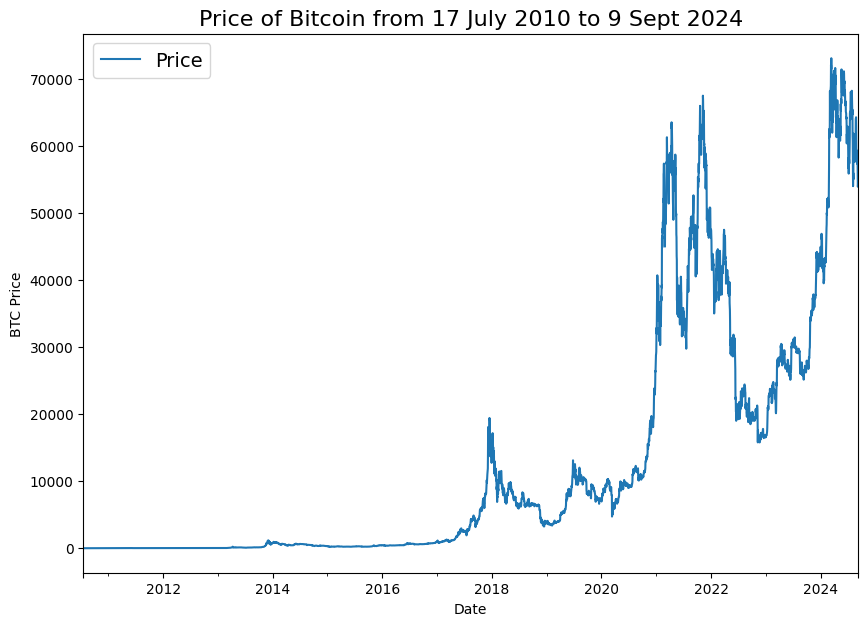

In [13]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.legend(fontsize=14);

***Since the model is not stationary we have to make it stationary***

***Augmented Dickey Fuller Test***

- Null Hypothesis -> Time series is Non Stationary
- Alternate Hypothesis -> Time series is Stationary

`from statsmodels.tsa.stattools import adfuller`
Contains 4 params
1. **ADF Statistic** : The ADF Statistic is a test statistic that ADF calculates which is then compared with Critical value to decide if the series is stationary or not

  A More negative value of ADF indicates more strong evidence against the null hypothesis

  If ADF Statistic < Critical Value -> Reject the null hypothesis

  If ADF Statistic > Critical Value -> Failed to reject the null hypothesis

2. **P-value** : Probablity that helps you determine statistical significance of test

  If P-value < 0.5 -> Series is stationary

  If P-value > 0.5 -> Series is not stationary

3. **Number of Lags** : The number of lags represent how many previous values are used to define auto correlation in the data

  `autolag='AIC'` means take minimum amount of lags but very less information loss

4. **Critical Values** : Corresponds to test statistic threshold for various confidence levels (1%, 5%, 10%) to determine if series is stationary

***If ADF statistic is less than critical value at any significance level then you can reject the null hypothesis***

In [37]:
# Checking for stationarity using Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(bitcoin_prices['Price'], autolag='AIC')

print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. No. of lags : ", dftest[2])
print("4. No. of obeservations used of ADF Regression and Critical Values Calculations : ", dftest[4])
print("5. Critical Values : ")
for key, val in dftest[4].items():
  print("\t", key, ": ", val)

1. ADF :  -1.1179678425124402
2. P-value :  0.7078536090232751
3. No. of lags :  33
4. No. of obeservations used of ADF Regression and Critical Values Calculations :  {'1%': -3.431624361626218, '5%': -2.8621031332717526, '10%': -2.5670697559674203}
5. Critical Values : 
	 1% :  -3.431624361626218
	 5% :  -2.8621031332717526
	 10% :  -2.5670697559674203


In [38]:
## Our Time series is not stationary due to the fact that
'''
1. ADF > Critical Values
2. P-value > 0.5 , so the null hypothesis is accepted
'''
# Making the time series stationary by using Differencing
differenced_series = bitcoin_prices['Price'].diff()
differenced_series.head()

,Price
Date,
2010-07-17,NaN
2010-07-18,0.0358
2010-07-19,-0.0050
2010-07-20,-0.0061
2010-07-21,0.0045


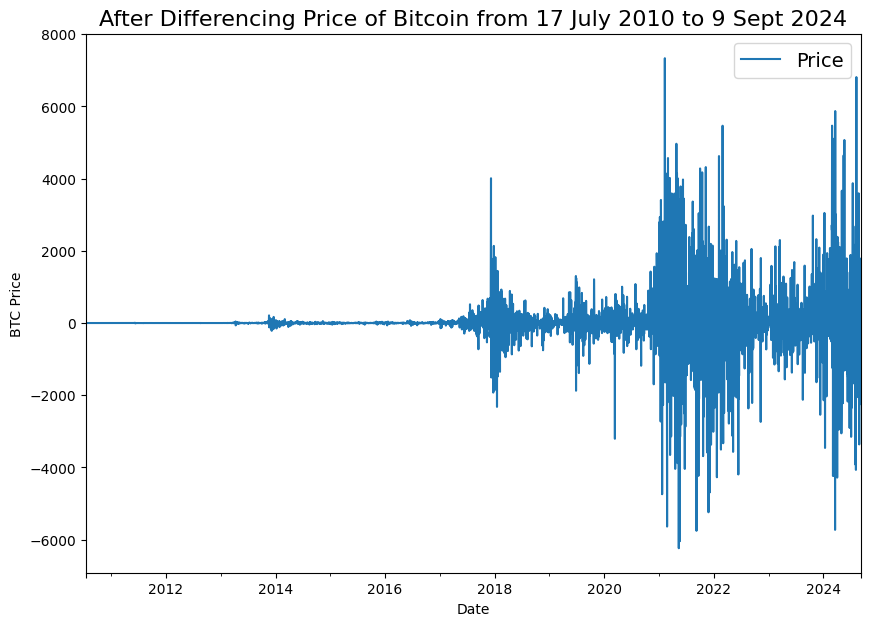

In [39]:
differenced_series.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("After Differencing Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.legend(fontsize=14);

In [40]:
after_differencing_adfuller = adfuller(differenced_series[1:], autolag='AIC')

print("1. ADF : ", after_differencing_adfuller[0])
print("2. P-value : ", after_differencing_adfuller[1])
print("3. No. of lags : ", after_differencing_adfuller[2])
print("4. No. of obeservations used of ADF Regression and Critical Values Calculations : ", after_differencing_adfuller[4])
print("5. Critical Values : ")
for key, val in after_differencing_adfuller[4].items():
  print("\t", key, ": ", val)

1. ADF :  -10.506744616106442
2. P-value :  1.049499578090943e-18
3. No. of lags :  32
4. No. of obeservations used of ADF Regression and Critical Values Calculations :  {'1%': -3.431624361626218, '5%': -2.8621031332717526, '10%': -2.5670697559674203}
5. Critical Values : 
	 1% :  -3.431624361626218
	 5% :  -2.8621031332717526
	 10% :  -2.5670697559674203


In [41]:
'''
Now our series is stationary due to the fact that
1. ADF < Critical Values
2. P-value < 0.5 , so the null hypothesis is rejected
'''

'\nNow our series is stationary due to the fact that\n1. ADF < Critical Values\n2. P-value < 0.5 , so the null hypothesis is rejected\n'

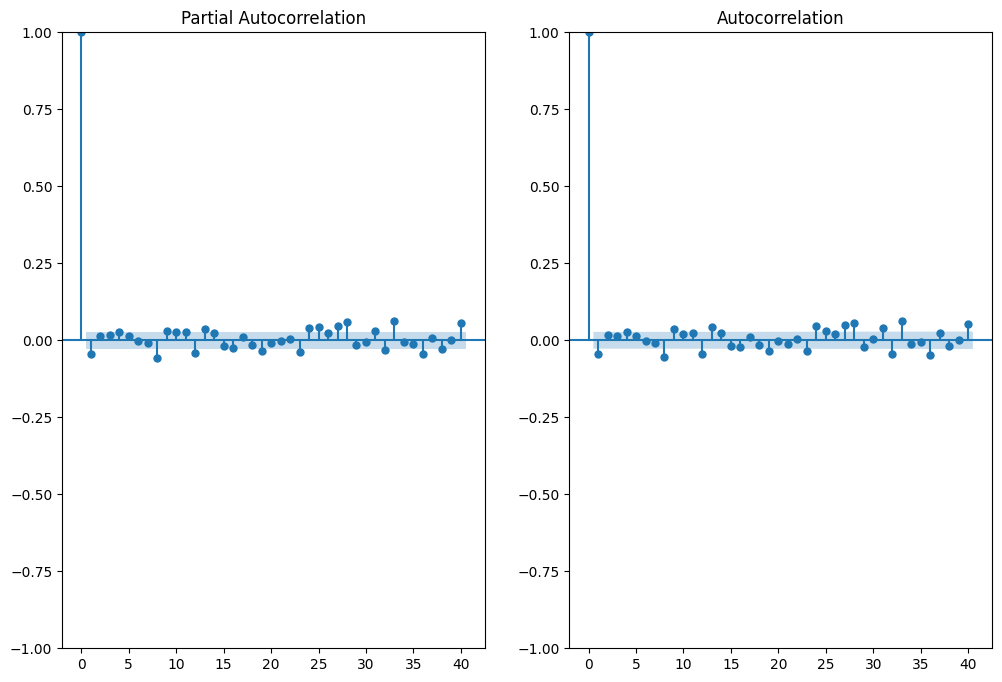

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(12,8))
plot_pacf(differenced_series[1:].values.squeeze(), lags=40, ax=ax[0])
acf = plot_acf(differenced_series[1:].values.squeeze(), lags=40, ax=ax[1])
plt.show()

In [46]:
# Splitting Data into train and test set
split_size = int(0.93 * len(differenced_series[1:]))
train, test = differenced_series[1:split_size], differenced_series[split_size:]
len(train), len(test)

(4804, 363)

# AR

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(40, 0, 0))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [62]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4804
Model:                ARIMA(40, 0, 0)   Log Likelihood              -37773.699
Date:                Tue, 17 Sep 2024   AIC                          75631.397
Time:                        07:47:23   BIC                          75903.440
Sample:                    07-18-2010   HQIC                         75726.937
                         - 09-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2339     12.581      0.416      0.677     -19.424      29.891
ar.L1         -0.0080      0.007     -1.148      0.251      -0.022       0.006
ar.L2          0.0070      0.007      1.074      0.2

In [63]:
pred = result.predict(start=len(train), end=len(differenced_series[1:])-1, dynamic=False)

In [64]:
pred.head()

,predicted_mean
2023-09-12,-27.056027
2023-09-13,-242.905070
2023-09-14,-118.773521
2023-09-15,64.319119
2023-09-16,59.204010


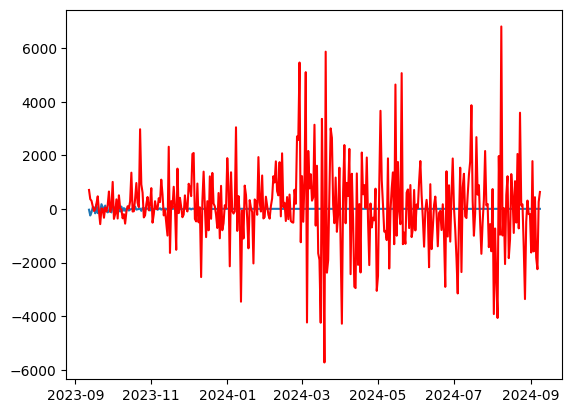

In [65]:
plt.plot(pred)
plt.plot(test, color='red');

In [ ]:
# Doing the same with python's inbuilt csv function
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2010-07-17_2024-09-09.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[4]))

timesteps.reverse()
btc_price.reverse()
timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 7, 18, 0, 0),
  datetime.datetime(2010, 7, 19, 0, 0),
  datetime.datetime(2010, 7, 20, 0, 0),
  datetime.datetime(2010, 7, 21, 0, 0),
  datetime.datetime(2010, 7, 22, 0, 0),
  datetime.datetime(2010, 7, 23, 0, 0),
  datetime.datetime(2010, 7, 24, 0, 0),
  datetime.datetime(2010, 7, 25, 0, 0),
  datetime.datetime(2010, 7, 26, 0, 0),
  datetime.datetime(2010, 7, 27, 0, 0)],
 [0.05, 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056])

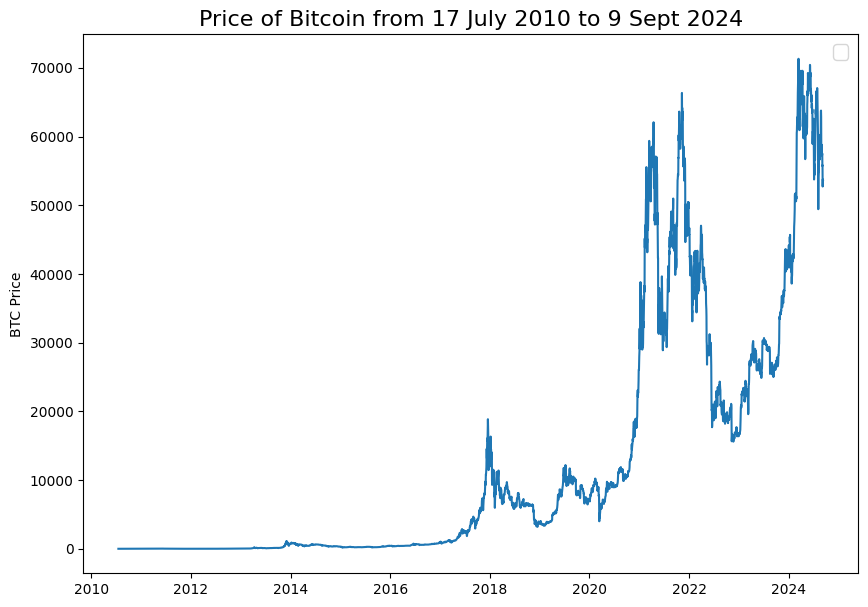

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 17 July 2010 to 9 Sept 2024", fontsize=16)
plt.ylabel('BTC Price')
plt.legend(fontsize=14);

In [ ]:
split_size = int(0.8 * len(bitcoin_prices))
X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(4134, 1034, 4134, 1034)

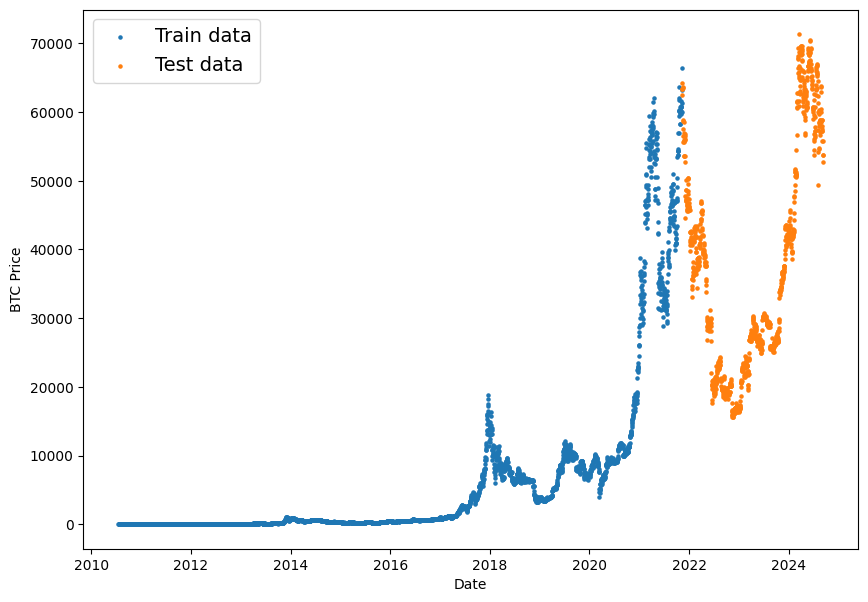

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

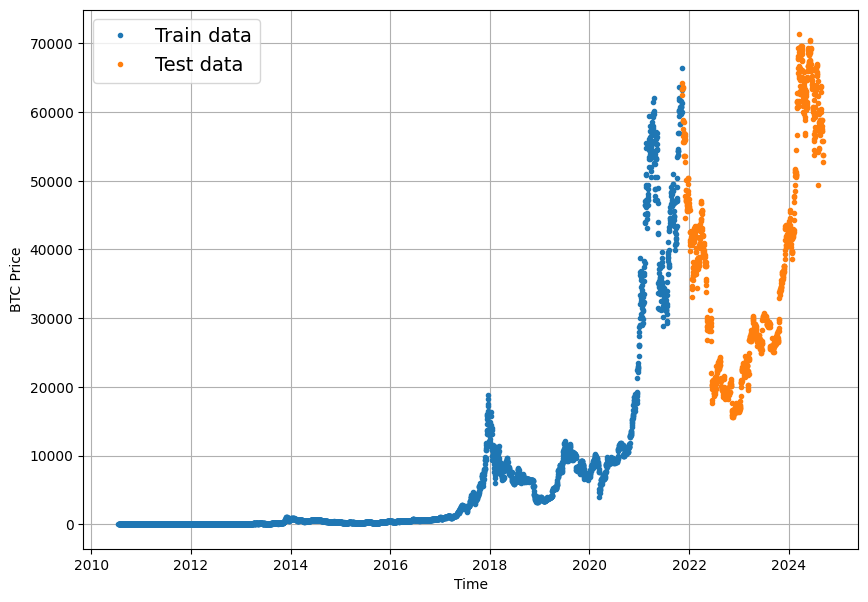

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Model 0 : Naive Forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

([63347.5012,
  64198.97340220052,
  62434.00795821887,
  63412.85980752298,
  63622.5547,
  63539.59326805828,
  58904.4092,
  58758.3434,
  56542.1638,
  55653.0576],
 [58821.98,
  57944.0,
  58800.05,
  57268.97,
  57297.96,
  57544.01,
  55737.91,
  55835.0,
  52738.0,
  53767.28])

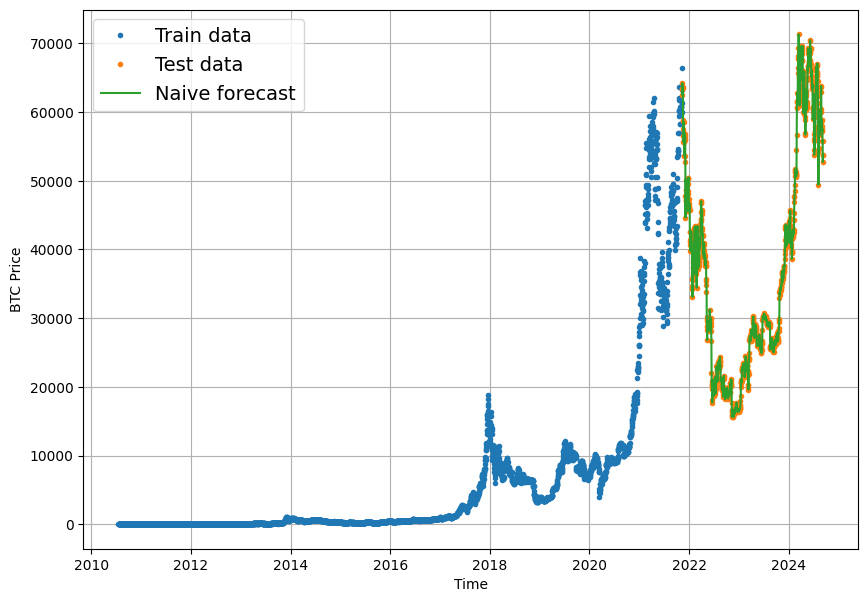

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values = naive_forecast, format="-", label="Naive forecast")

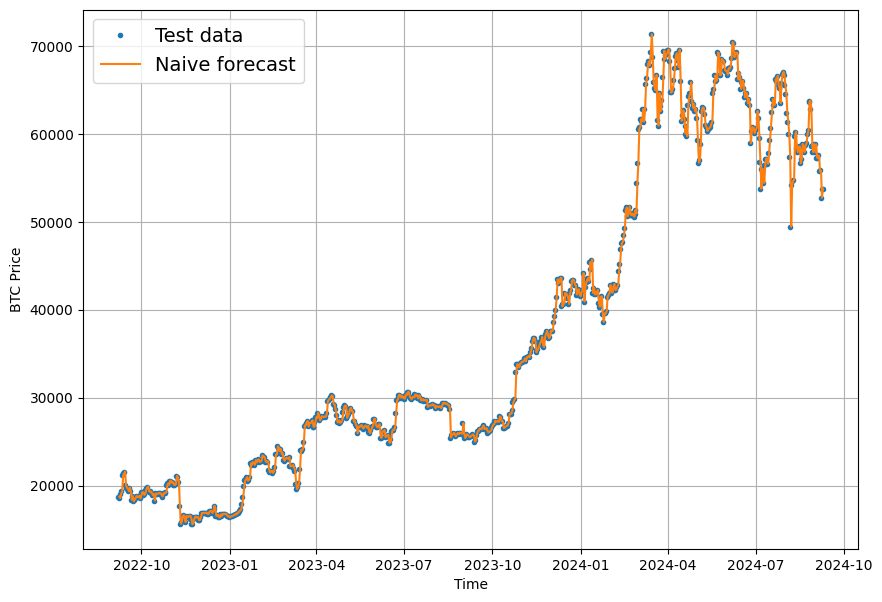

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season


In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 684.85785,
 'mse': 1295928.8,
 'rmse': 1138.3887,
 'mape': 1.8192456,
 'mase': 1.0002357}

In [ ]:
# Windowing dataset
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon = 1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(tf.squeeze(test_window).numpy())
print(tf.squeeze(test_label).numpy())

[1 2 3 4 5 6 7]
8


In [ ]:
def make_windows(x, window_size=7, horizon=1):
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    start_indices = np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    window_indexes = window_step + start_indices
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [ ]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizer.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_window, test_labels),
            collbacks = [create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

In [ ]:
model_2 = tf.keras.models.load_model("model_experiment/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [ ]:
# Model 3 : Dense (Window = 30, horizon = 7)
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizer.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

In [ ]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

In [ ]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5]

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.MAE(y_true, y_pred)
  mse = tf.keras.metrics.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
# Model 4 : Conv1D
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
train_windows[0].shape

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

In [ ]:
# Model 5: RNN (LSTM)
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, ouputs = output, name = "model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizer.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results